### Question Answer Retriever

Uses asymmetric search. You input a query or a question. The script then uses semantic search to find relevant passages in Simple English Wikipedia

We'll be using english Wikipedia repo which has 170,000 articles adnd documents. Out of which we'll ask questions.

https://huggingface.co/models?library=sentence-transformers&sort=downloads

model used: nq-distilbert-base-v1 .


The model was trained on the Natural Questions dataset with real questions prepared by Google from queries together with annotated data from Wikipedia providing the answer. For the passages, we encode the Wikipedia article together with the individual text passages.

Train dataset = https://ai.google.com/research/NaturalQuestions/dataset

Test Dataset : http://sbert.net/datasets 

In [ ]:
# https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/simplewiki-2020-11-01.jsonl.gz

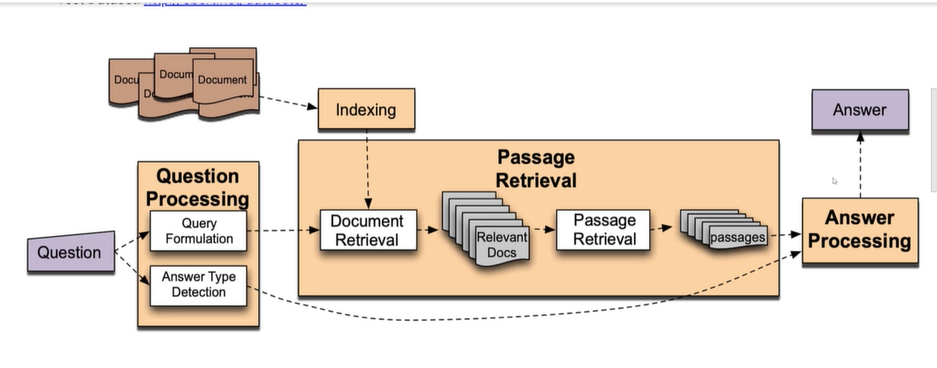

In [8]:
from IPython import display
display.Image("Data/Question-answer-retriever.png")

In [12]:
import tensorflow as tf
import numpy as np
from sentence_transformers import SentenceTransformer, util
import os
import json
import gzip

In [14]:
util.http_get("https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/simplewiki-2020-11-01.jsonl.gz", "simplewiki-2020-11-01.json1.gz" )

  0%|          | 0.00/50.2M [00:00<?, ?B/s]

Create SentenceTransformer model

In [15]:
model = SentenceTransformer("nq-distilbert-base-v1")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/554 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Decode json and gz dataset

In [19]:
passages = []
with gzip.open("simplewiki-2020-11-01.json1.gz", "rt", encoding="utf8") as file:
    for line in file:
        data =json.loads(line.strip())
        #print(data)
        for paragraph in data["paragraphs"]:
            passages.append([data["title"], paragraph])

In [20]:
#total data points
len(passages)

509663

Shuffle passages

In [21]:
from random import shuffle
shuffle(passages)

Choosing 100,000 datapoints

In [22]:
passages = passages[0:100_000]

Encoding the document (project text doc into vector space)

In [ ]:
corpus_embeddings = model.encode(passages, convert_to_tensor=True, show_progress_bar=True)

In [ ]:
def get_answer(query):

    question_embeddings = model.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(question_embeddings, corpus_embeddings, top_k=3)[0]

    print("Results:")

    for hit in hits:
        print(passages[hit['corpus_id']])

In [ ]:
get_answer("what is the india")